<a href="https://colab.research.google.com/github/ashwinibhatM19/Samsung/blob/main/RNN%2CLSTM%2CGRU_on_Humor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [2]:
# Sample humorous text
text = """My mother always used to say:
The older you get,
the better you get,
unless you're a banana"""

In [3]:
len(text)

91

In [4]:
# Tokenize the text
tokenizer = Tokenizer(char_level=True)


In [5]:
tokenizer.fit_on_texts([text])

In [6]:
sequences = tokenizer.texts_to_sequences([text])[0]

In [7]:
len(sequences)

91

In [8]:
# Prepare input-output pairs
sequence_length = 5

X = []

y = []

for i in range(len(sequences) - sequence_length):
    X.append(sequences[i:i+sequence_length])
    y.append(sequences[i+sequence_length])

In [9]:
# X,y

In [10]:
X = np.array(X)

y = keras.utils.to_categorical(y,
                               num_classes=len(tokenizer.word_index) + 1)

RNN Model

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding

rnn_model = Sequential()

rnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=50,
                        input_length=sequence_length))

rnn_model.add(SimpleRNN(50))

rnn_model.add(Dense(len(tokenizer.word_index) + 1,
                    activation='softmax'))
#############################################################
rnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam')
#############################################################
rnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

LSTM Model

In [12]:
from keras.layers import LSTM

lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                         output_dim=50,
                         input_length=sequence_length))

lstm_model.add(LSTM(50))

lstm_model.add(Dense(len(tokenizer.word_index) + 1,
                     activation='softmax'))
###################################################
lstm_model.compile(loss='categorical_crossentropy',
                   optimizer='adam')
#################################################
lstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

GRU Model

In [13]:
from keras.layers import GRU

gru_model = Sequential()

gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                        output_dim=50,
                        input_length=sequence_length))

gru_model.add(GRU(50))

gru_model.add(Dense(len(tokenizer.word_index) + 1,
                    activation='softmax'))
##########################################################
gru_model.compile(loss='categorical_crossentropy',
                  optimizer='adam')
#################################################
gru_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Training the Models

In [14]:
# Train RNN model
rnn_model.fit(X, y, epochs=100, verbose=1)
######################################################
# Train LSTM model
lstm_model.fit(X, y, epochs=100, verbose=1)
######################################################
# Train GRU model
gru_model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.0931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.0404
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9894
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9455
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.9065
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.8294
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.7812
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.7100
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.6378
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.5586
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.4686
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4079
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3662
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.2300
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.1960
Epoch 16/100
3/3 ━━

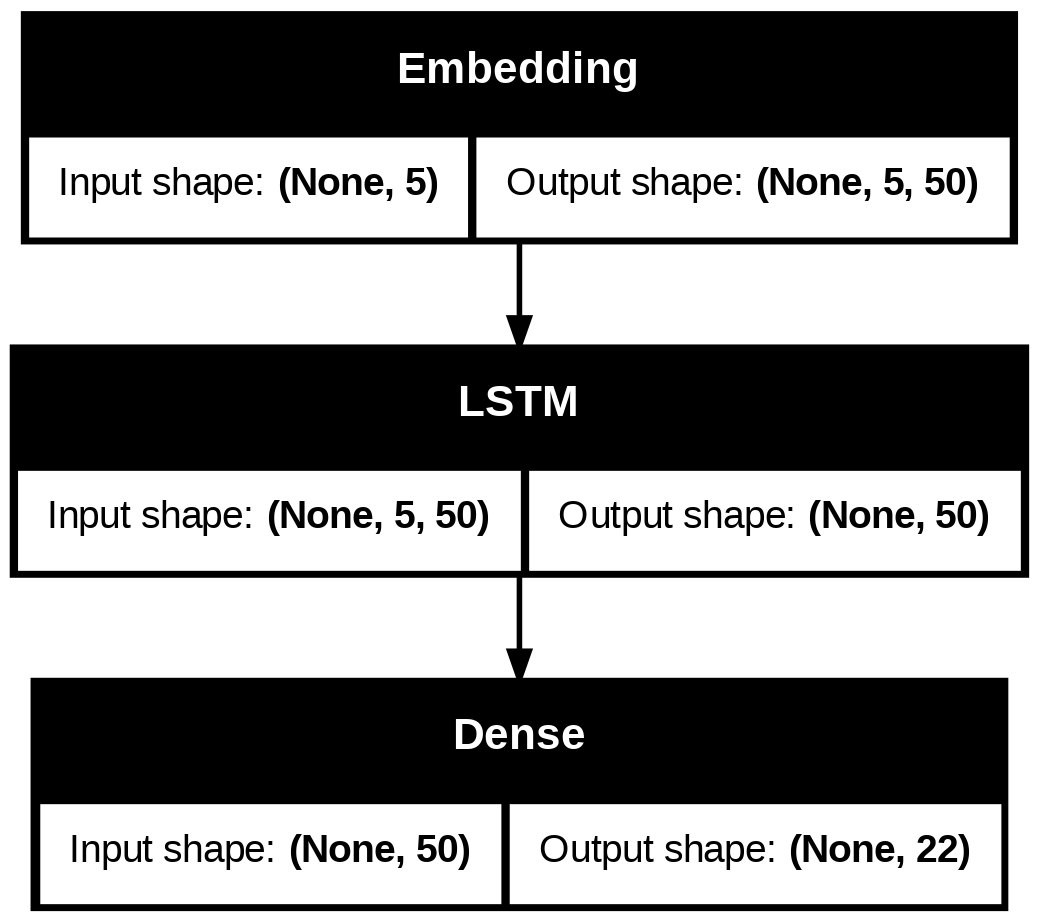

In [15]:
from tensorflow import keras
keras.utils.plot_model(lstm_model, show_shapes=True)

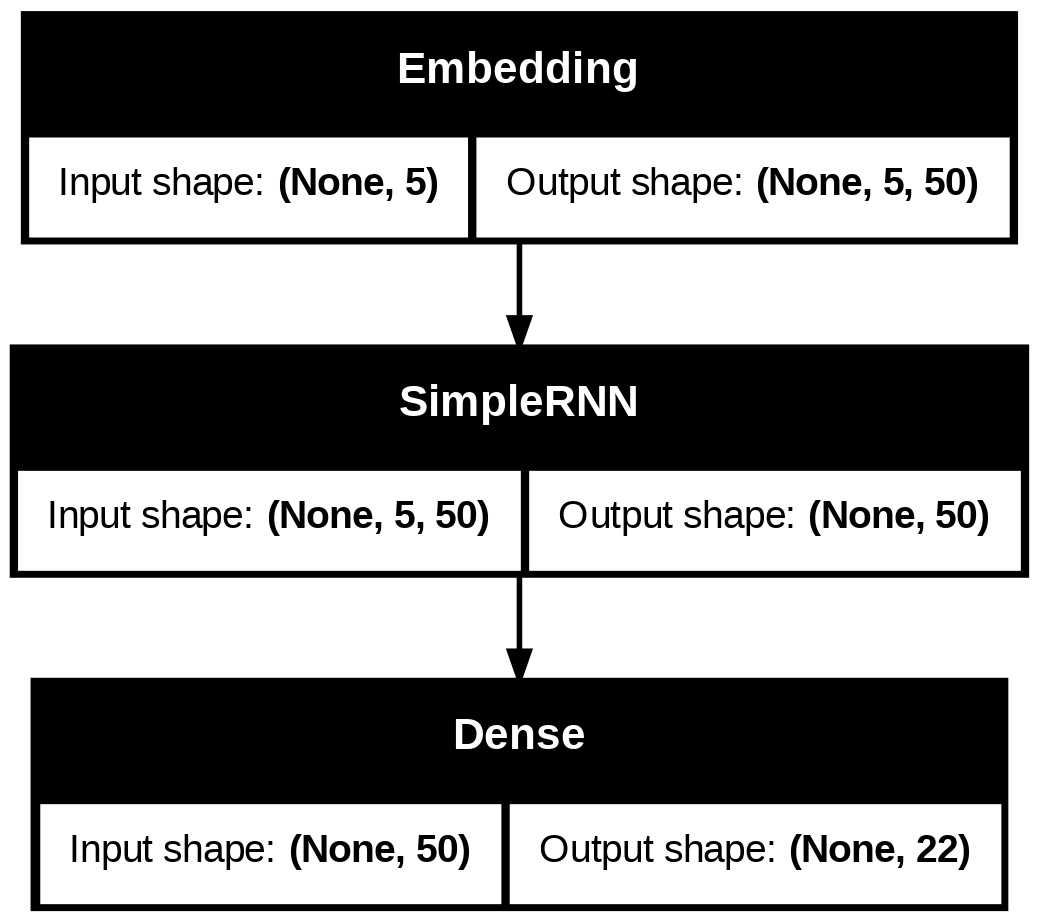

In [16]:
from tensorflow import keras
keras.utils.plot_model(rnn_model, show_shapes=True)

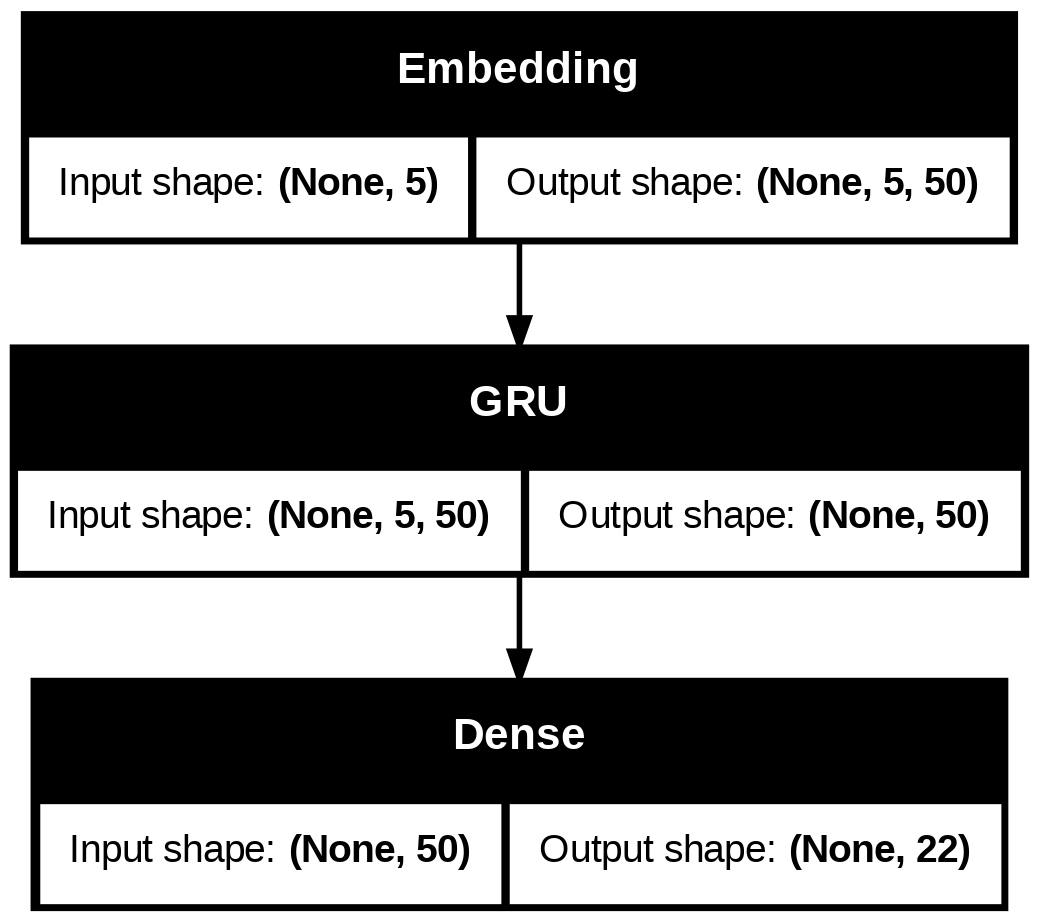

In [17]:
from tensorflow import keras
keras.utils.plot_model(gru_model, show_shapes=True)

Generating & Analysing Humor

In [18]:
def generate_text(model, tokenizer, seed_text, num_chars):
    for _ in range(num_chars):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list],
                                   maxlen=sequence_length,
                                   padding='pre')
        predicted = model.predict(token_list,
                                  verbose=0)
        predicted_char = tokenizer.index_word[np.argmax(predicted)]
        seed_text += predicted_char
    return seed_text


In [19]:
seed_text = "Banana joke......."

print("RNN:", generate_text(rnn_model, tokenizer, seed_text, 50))
print("LSTM:", generate_text(lstm_model, tokenizer, seed_text, 50))
print("GRU:", generate_text(gru_model, tokenizer, seed_text, 50))


RNN: Banana joke....... ar ana ae anatee always used to say:
the better y
LSTM: Banana joke.......saayuaaanaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
GRU: Banana joke.......t,
ther you get,
ther you get,
ther you get,
ther 
